# Задание 7: Численные методы решения задачи Коши для СОДУ

In [1]:
import package.helpers as hp
from package.methods import ODE

import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt

In [2]:
# Начальные данные
x0, x1 = 0, np.pi
y0 = np.array([
    np.pi / 10,
    np.pi / 35
])

### Часть 1. Расчетные схемы Рунге-Кутты с постоянным шагом

In [3]:
my_var_ode = ODE(method='BASE')

value, *_ = my_var_ode(hp.diff_equation, x0, y0, x1, steps_type='const', eps=10 ** -4)

print(f'Решение СОДУ: {value}')
print(f'Истинная погрешность: {hp.real_y(x0, y0, x1) - value}')

Решение СОДУ: [ 0.31774213 -0.01152206]
Истинная погрешность: [1.70716620e-05 1.78641823e-03]


### Часть 2. Расчетные схемы Рунге-Кутты с автоматическим выбором шага

In [4]:
value = my_var_ode(hp.diff_equation, x0, y0, x1, steps_type='adaptive', eps=10 ** -5)[0][-1]

print(f'Решение СОДУ: {value}')
print(f'Истинная погрешность: {hp.real_y(x0, y0, x1) - value}')

Решение СОДУ: [ 0.31775938 -0.00975676]
Истинная погрешность: [-1.73206663e-07  2.11114769e-05]


### Часть 3. Анализ эффективности методов Рунге-Кутты

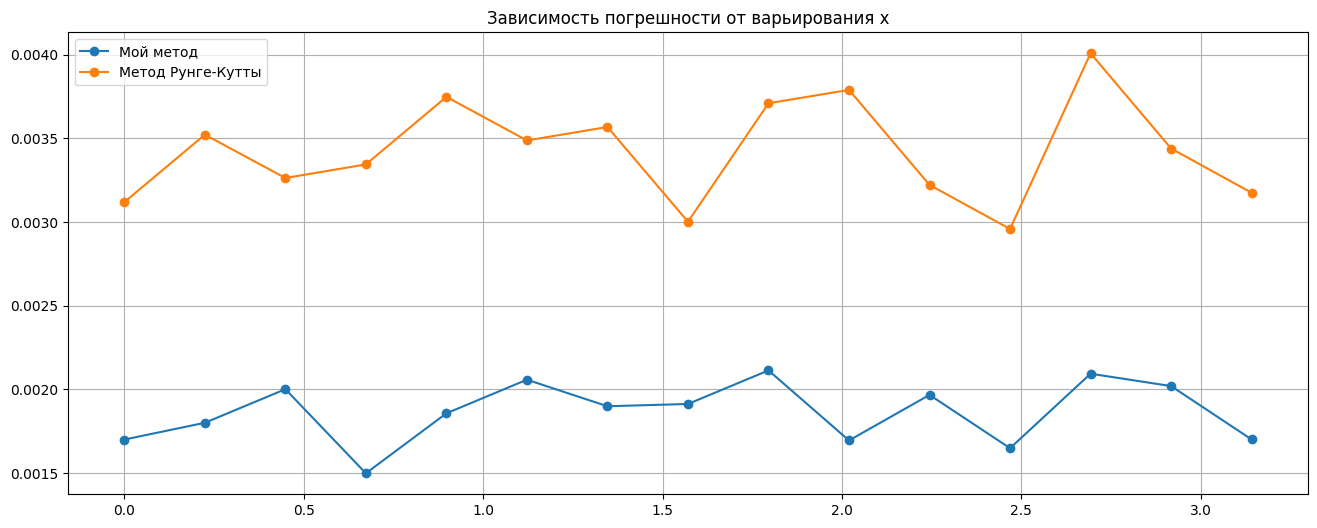

In [5]:
plt.figure(figsize=(16, 6))
plt.title('Зависимость погрешности от варьирования x')

n_part = 100
comp_n_part = 15  # Длина сжатого списка

args = np.linspace(x0, x1, n_part)
comp_args = np.linspace(x0, x1, comp_n_part)

# Погрешность метода моего варианта
mv_step = my_var_ode(hp.diff_equation, x0, y0, x1, steps_type='const', eps=10 ** -4)[2]  # Получаем шаг
mv_errors = hp.compact_list([
    norm(my_var_ode(hp.diff_equation, x0, y0, x, step=mv_step, steps_type='none')[0] - hp.real_y(x0, y0, x)) 
    for x in args
], comp_n_part)

# Погрешность метода Рунге-Кутты
rk_ode = ODE(method='RUNGE_KUTTA')

rk_step = rk_ode(hp.diff_equation, x0, y0, x1, steps_type='const', eps=10 ** -4)[2]  # Получаем шаг
rk_errors = hp.compact_list([
    norm(rk_ode(hp.diff_equation, x0, y0, x, step=rk_step, steps_type='none')[0] - hp.real_y(x0, y0, x)) 
    for x in args
], comp_n_part)

# Строим графики
plt.plot(comp_args, mv_errors, marker='o', label="Мой метод")
plt.plot(comp_args, rk_errors, marker='o', label="Метод Рунге-Кутты")

plt.grid()
plt.legend();

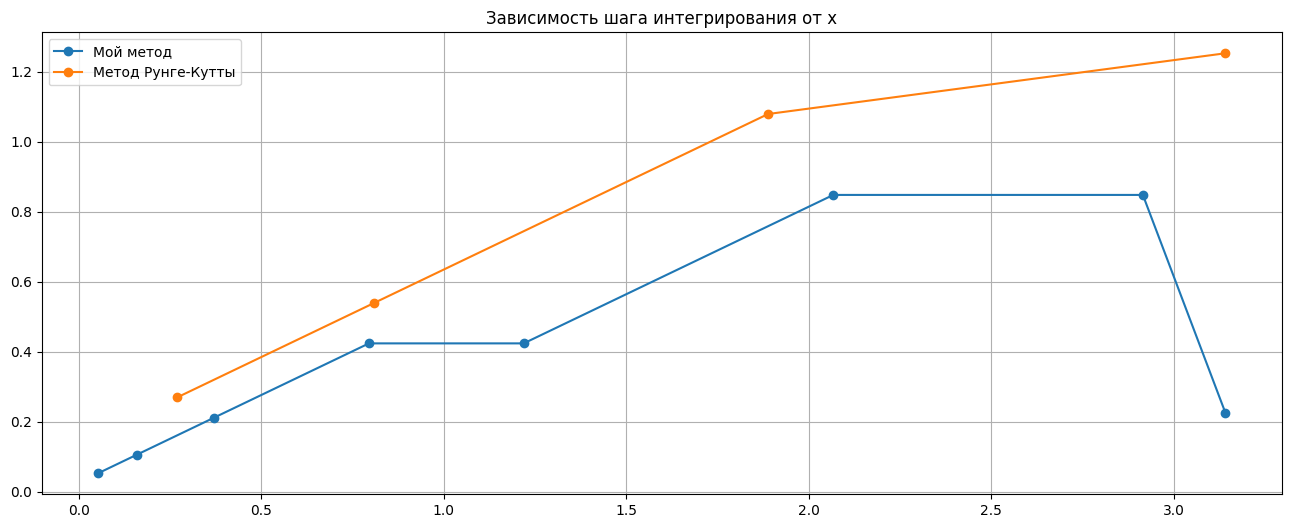

In [6]:
plt.figure(figsize=(16, 6))
plt.title('Зависимость шага интегрирования от x')

mv_steps = my_var_ode(hp.diff_equation, x0, y0, x1, steps_type='adaptive', eps=10 ** -5)[2]
rk_steps = rk_ode(hp.diff_equation, x0, y0, x1, steps_type='adaptive', eps=10 ** -5)[2]

plt.plot(x0 + np.cumsum(mv_steps), mv_steps, marker='o', label='Мой метод')
plt.plot(x0 + np.cumsum(rk_steps), rk_steps, marker='o', label='Метод Рунге-Кутты')

plt.grid()
plt.legend();

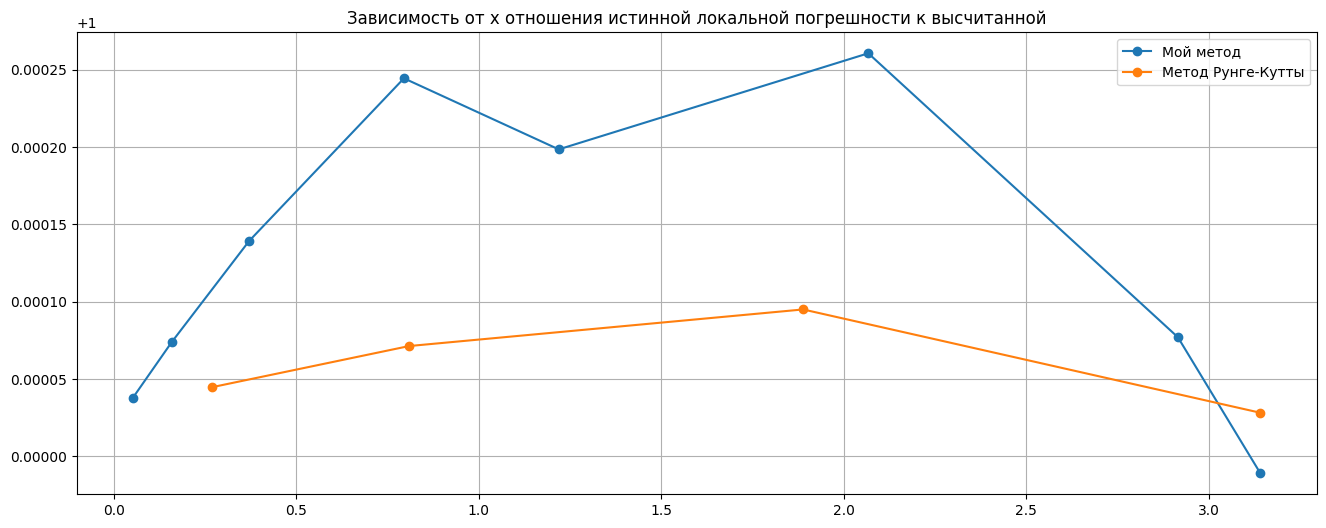

In [7]:
plt.figure(figsize=(16, 6))
plt.title('Зависимость от x отношения истинной локальной погрешности к высчитанной')

# Погрешность метода моего варианта
mv_vals, mv_loc_err, mv_steps, _ = my_var_ode(hp.diff_equation, x0, y0, x1, steps_type='adaptive', eps=10 ** -5)

mv_args = np.append([x0], x0 + np.cumsum(mv_steps))  # Точки x, в которых считали ДУ
mv_vals = np.vstack([y0, mv_vals])  # Значение ДУ в этих точках

real_mv_loc_err = np.array([norm(hp.real_y(mv_args[i], mv_vals[i], mv_args[i + 1]) - mv_vals[i + 1]) 
                            for i in range(mv_args.size - 1)])
mv_ratio = real_mv_loc_err / mv_loc_err

# Погрешность метода Рунге-Кутты
rk_vals, rk_loc_err, rk_steps, _ = rk_ode(hp.diff_equation, x0, y0, x1, steps_type='adaptive', eps=10 ** -5)

rk_args = np.append([x0], x0 + np.cumsum(rk_steps))
rk_vals = np.vstack([y0, rk_vals])

real_rk_loc_err = np.array([norm(hp.real_y(rk_args[i], rk_vals[i], rk_args[i + 1]) - rk_vals[i + 1]) 
                         for i in range(rk_args.size - 1)])
rk_ratio = real_rk_loc_err / rk_loc_err

# Построение графиков
plt.plot(mv_args[1:], mv_ratio, marker='o', label='Мой метод')
plt.plot(rk_args[1:], rk_ratio, marker='o', label='Метод Рунге-Кутты')

plt.grid()
plt.legend();

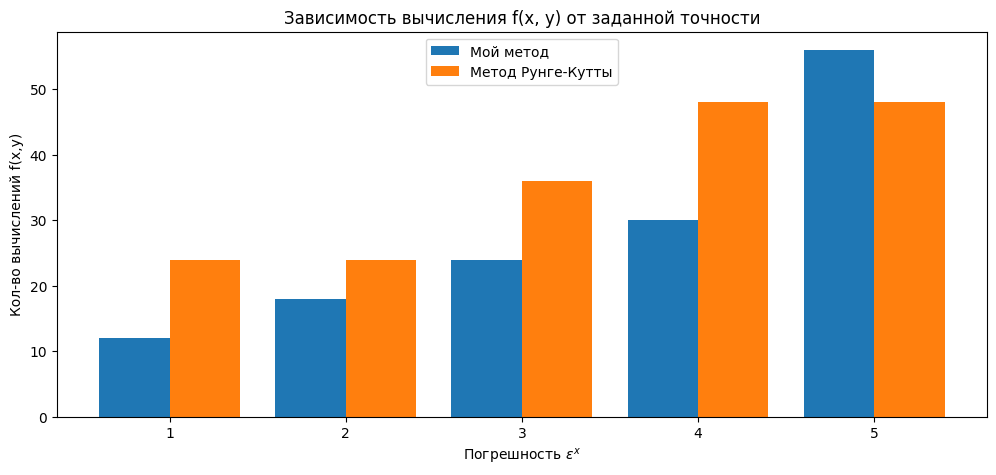

In [8]:
plt.figure(figsize=(12, 5))
plt.title('Зависимость вычисления f(x, y) от заданной точности')

eps_list = [10 ** -i for i in range(1, 6)]

mv_calc = [my_var_ode(hp.diff_equation, x0, y0, x1, steps_type='adaptive', eps=eps_list[i])[3] for i in range(5)]
rk_calc = [rk_ode(hp.diff_equation, x0, y0, x1, steps_type='adaptive', eps=eps_list[i])[3] for i in range(5)]

plt.bar(-np.log10(eps_list) - 0.2, mv_calc, width=0.4, label='Мой метод')
plt.bar(-np.log10(eps_list) + 0.2, rk_calc, width=0.4, label='Метод Рунге-Кутты')

plt.xlabel('Погрешность $\epsilon^x$')
plt.ylabel('Кол-во вычислений f(x,y)')
plt.legend(loc='upper center');